# Data Preprocessing

## Import neccesary libarys

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the DataSet

In [219]:
# Load the dataset
# data = pd.read_csv('bank.csv' , sep=';')
data = pd.read_csv('bank-full.csv' , sep=';')

# View the first few rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [220]:
#view the last few rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Sanity check data

In [221]:
# Check the shape of the data
# cloums and rows
data.shape

(45211, 17)

In [222]:
# Check column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [223]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [224]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [225]:
#identify the unique values and garbage values
for i in data.select_dtypes(include='object').columns:
    print(f'\nUnique values in {i} are {data[i].unique()}')


Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital are ['married' 'single' 'divorced']

Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default are ['no' 'yes']

Unique values in housing are ['yes' 'no']

Unique values in loan are ['no' 'yes']

Unique values in contact are ['unknown' 'cellular' 'telephone']

Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome are ['unknown' 'failure' 'other' 'success']

Unique values in y are ['no' 'yes']


## Missing Value Treatment

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [227]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # For categorical columns
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True) 
        else:
            data[col].fillna(data[col].median(), inplace=True)  # Fill numerical with median

print("Missing values treated.")


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Missing values treated.


In [228]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Duplicate and Garbage value treatment

In [229]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Number of duplicate rows: 0


In [230]:
# data.to_csv('cleaned_data.csv', index=False)

# Exploratory Data Analysis (EDA)

In [231]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [232]:
data.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


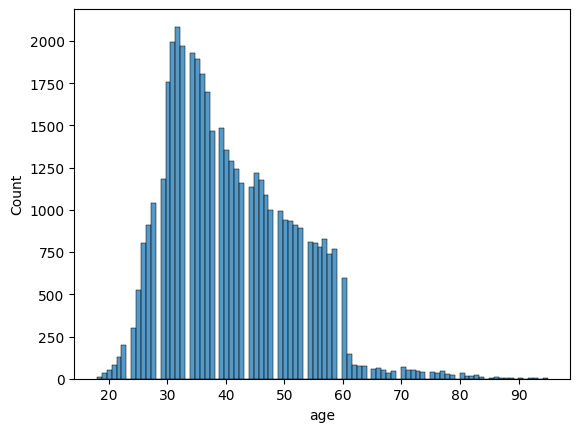

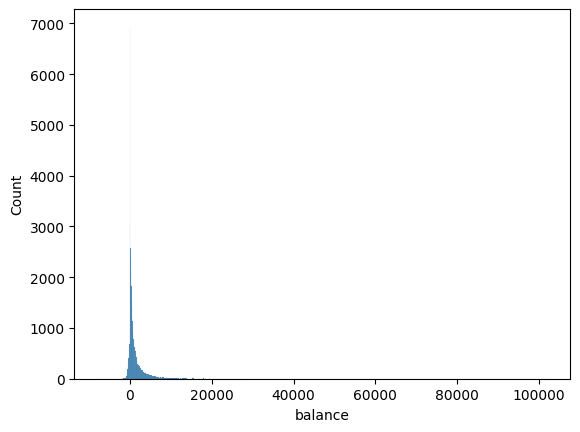

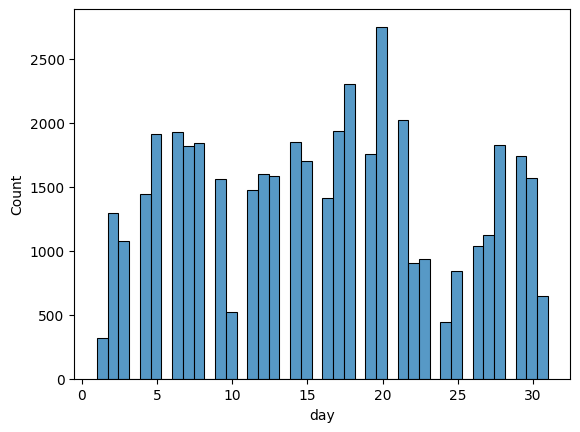

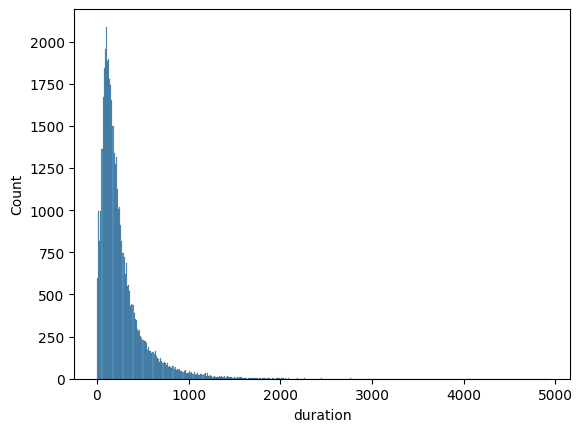

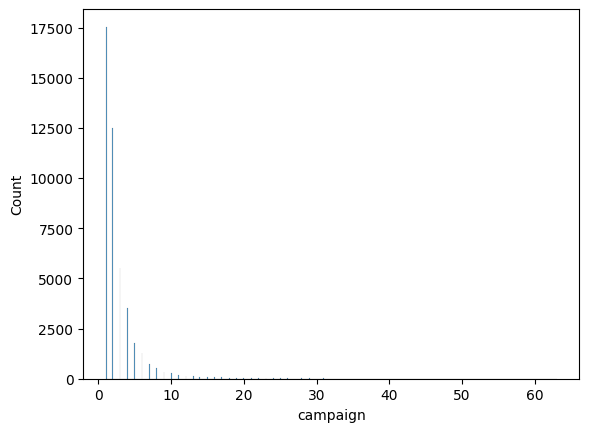

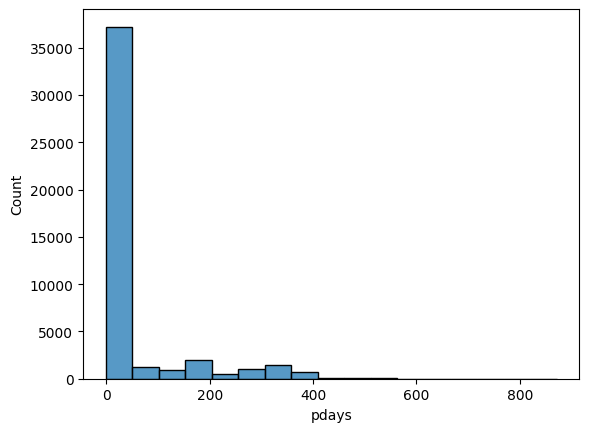

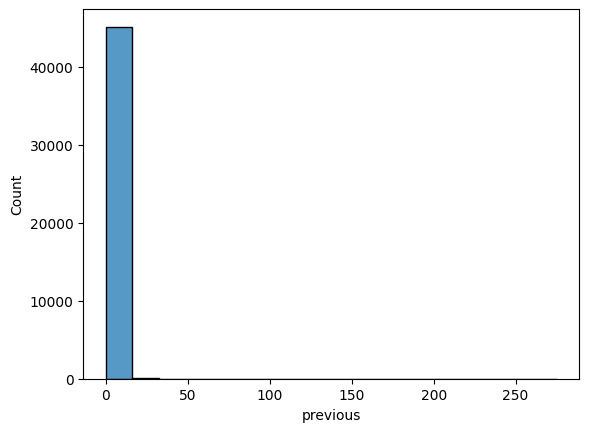

In [233]:
#histogram to understand the distribution of the data
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data, x= i)
    plt.show()

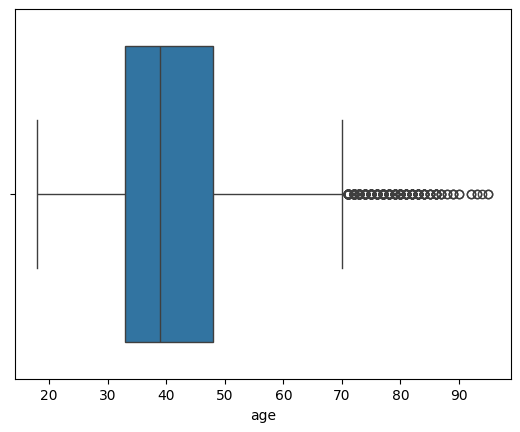

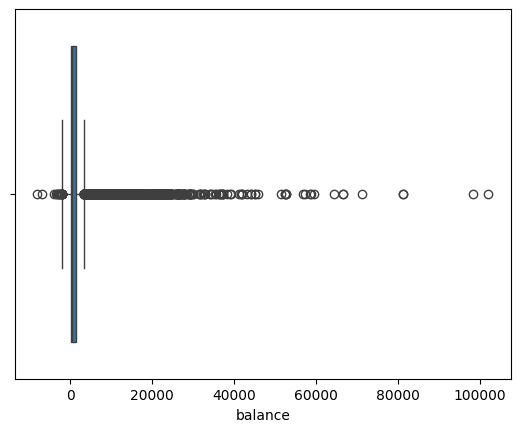

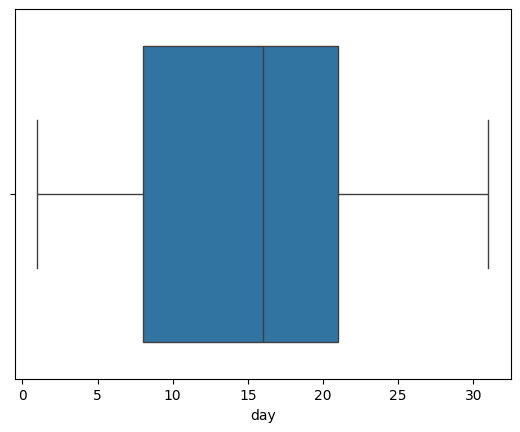

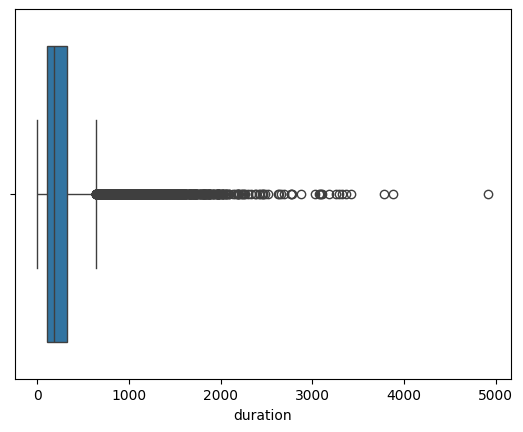

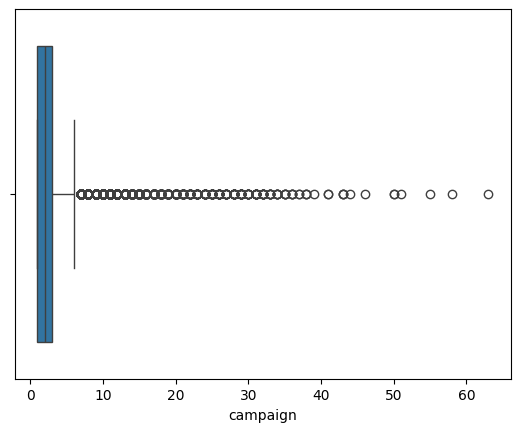

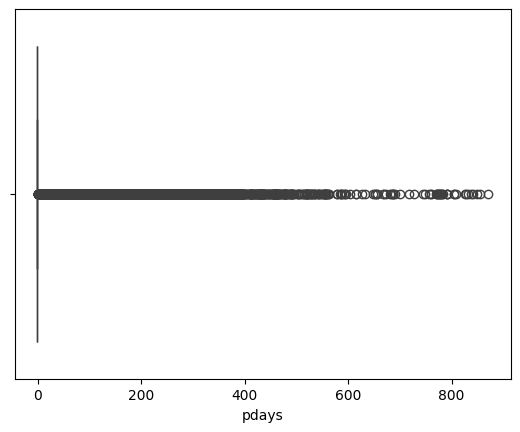

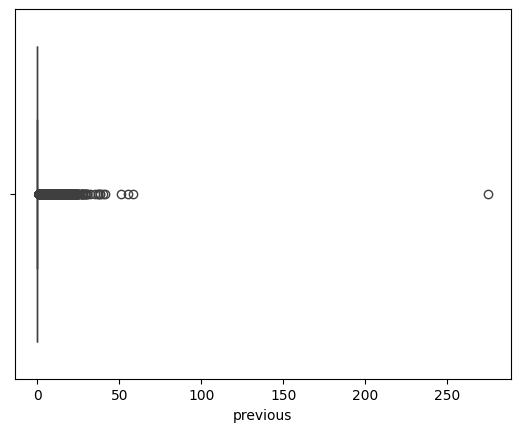

In [234]:
# Boxplot to identify the outliers
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x= i)
    plt.show()

In [235]:
# #scatter plot to understand the relationship between the variables
# for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
#     sns.scatterplot(data=data, x=i, y=data['y'])
#     plt.show() 

In [236]:
data.select_dtypes(include='number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<Axes: >

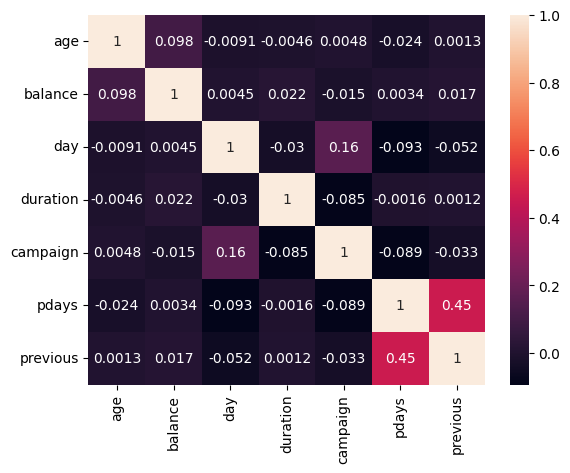

In [237]:
#correlation heatmap to interpreat the realationship and mulitcollinearity 
s = data.select_dtypes(include='number').corr()
sns.heatmap(s, annot=True)

# Outlier Treatment

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [239]:
# for col in ['age', 'balance', 'campaign', 'duration']:
#     if data[col].dtype == 'int64':
#         # Calculate IQR for detecting outliers
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the lower and upper limits for outliers
#         lower_limit = Q1 - 1.5 * IQR
#         upper_limit = Q3 + 1.5 * IQR

#         # Cap the values in the column to the defined limits
#         data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
#         data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

#         # Convert the column to integer type if it originally contained integers
    
#         data[col] = data[col].astype(int)

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


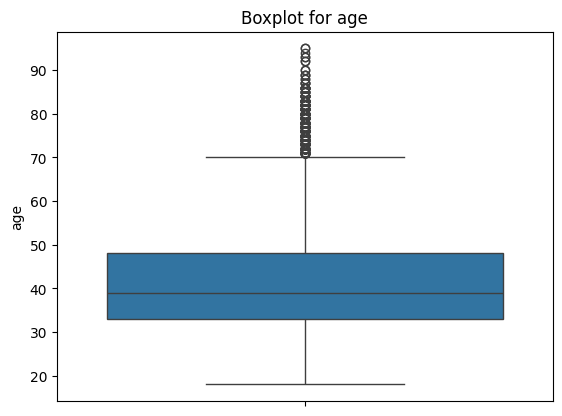

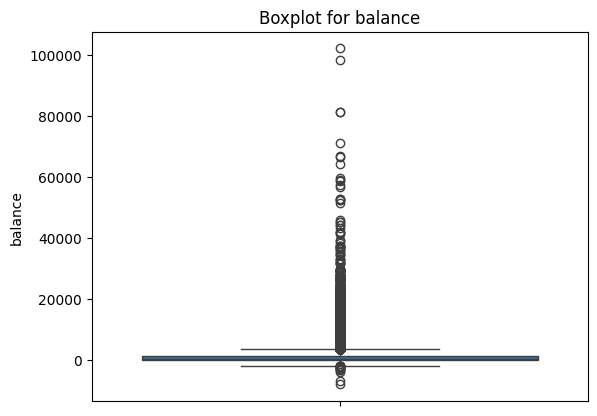

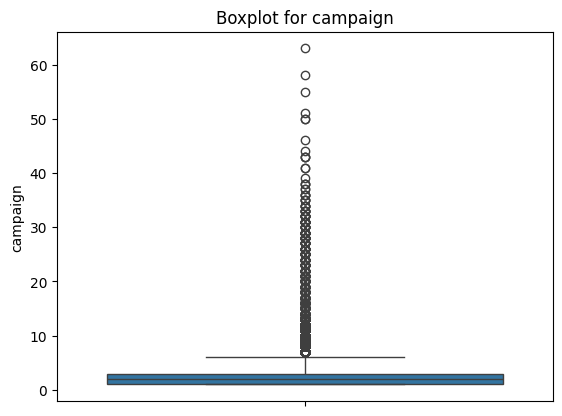

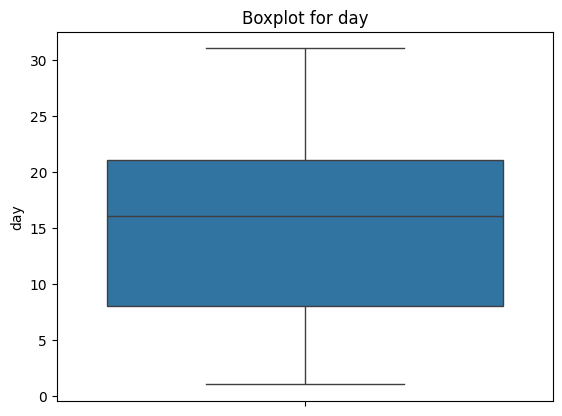

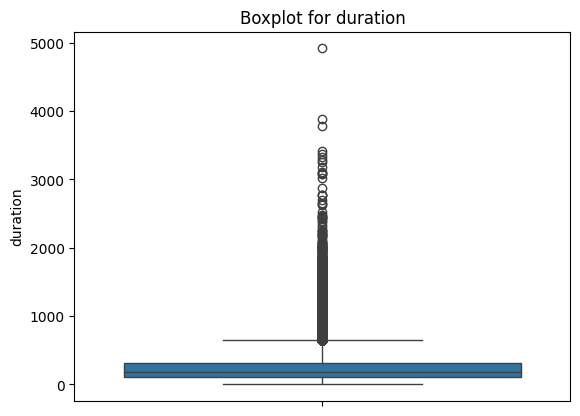

In [241]:

for col in ['age', 'balance', 'campaign', 'day', 'duration']:
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


# Feature Engineering

## Feature transformation

In [242]:
# Drop or create a binary feature for 'pdays' (days since last contact)
# data['previously_contacted'] = data['pdays'].apply(lambda x: 1 if x != -1 else 0)
data = data.drop(['pdays'], axis=1)  # Drop 'pdays' if it leads to leakage

# 2. Drop 'duration' feature to avoid leakage
data = data.drop(['duration'], axis=1)

In [243]:
# import pandas as pd

# # Create the new feature 'contact_intensity'
# data['contact_intensity'] = data['pdays'] * data['previous']


In [244]:
# Create an interaction feature for high balance and no previous contact
data['balance_no_previous'] = data['balance'] * (data['previous'] == 0)

In [245]:
# data.to_csv('new_feature_data.csv', index=False)

In [246]:
# # Duration Binning
# data['duration_bin'] = pd.cut(data['duration'], bins=[0, 300, 600, float('inf')],
#                               labels=['short', 'medium', 'long'])
# data = pd.get_dummies(data, columns=['duration_bin'], drop_first=True)

# Contact Interaction
# data['successful_contact'] = data['contact'] + "_" + data['poutcome']
# data = pd.get_dummies(data, columns=['successful_contact'], drop_first=True)


In [247]:
from sklearn.preprocessing import LabelEncoder

# Age Binning
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 45, 100], labels=['young', 'middle-aged', 'old'])

# Label Encoding for age_group
label_encoder = LabelEncoder()
data['age_group'] = label_encoder.fit_transform(data['age_group'])


In [248]:
data['successful_contact'] = data['contact'] + "_" + data['poutcome']

In [249]:
label_encoder = LabelEncoder()
data['successful_contact'] = label_encoder.fit_transform(data['successful_contact'])

In [250]:
data = data.drop(columns=['age','contact', 'poutcome'])

# data = data.drop(columns=['previous'])
# data = data.drop(columns=['duration'])

In [251]:
# # Drop the unnecessary columns after transformations and encoding
# data = data.drop(columns=['age', 'contact', 'poutcome', 'duration', 'pdays','previous'])


## Encoding the data

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job                  45211 non-null  object
 1   marital              45211 non-null  object
 2   education            45211 non-null  object
 3   default              45211 non-null  object
 4   balance              45211 non-null  int64 
 5   housing              45211 non-null  object
 6   loan                 45211 non-null  object
 7   day                  45211 non-null  int64 
 8   month                45211 non-null  object
 9   campaign             45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  balance_no_previous  45211 non-null  int64 
 13  age_group            45211 non-null  int64 
 14  successful_contact   45211 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [253]:
# Binary Features
binary_columns = ['default', 'housing', 'loan', 'y']

for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})


In [254]:
# Categorical Features
# categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] 


# # delete if needed
categorical_columns = ['job', 'marital', 'education', 'month'] 

# for col in categorical_columns:
#     data[col] = data[col].astype('category')

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data = data.astype('int64')


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   default              45211 non-null  int64
 1   balance              45211 non-null  int64
 2   housing              45211 non-null  int64
 3   loan                 45211 non-null  int64
 4   day                  45211 non-null  int64
 5   campaign             45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   balance_no_previous  45211 non-null  int64
 9   age_group            45211 non-null  int64
 10  successful_contact   45211 non-null  int64
 11  job_blue-collar      45211 non-null  int64
 12  job_entrepreneur     45211 non-null  int64
 13  job_housemaid        45211 non-null  int64
 14  job_management       45211 non-null  int64
 15  job_retired          45211 non-null  int64
 16  job_self-employed    4

In [256]:
correlation_matrix = data.corr()

correlation_with_y = correlation_matrix['y'].sort_values(ascending=False)



In [257]:

print("Correlation with y:")
print(correlation_with_y)

Correlation with y:
y                      1.000000
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
age_group              0.055330
balance                0.052838
month_feb              0.038417
job_management         0.032919
job_unemployed         0.020390
education_unknown      0.012053
balance_no_previous    0.001380
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
default               -0.022419
job_services          -0.027864
day                   -0.028348
month_jul             -0.034382
education_secondary 

In [258]:
data.to_csv('processed_data_Encoding.csv', index=False)

#  Normalize/Scale Numerical Features 

min max scaling

In [259]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# # numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# numerical_cols = ['balance', 'campaign',  'previous']

# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [260]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a pandas DataFrame called `df`
# numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

numerical_cols = ['balance', 'campaign',  'previous']

# Apply scaling only to the specified numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [261]:
# # Save the processed DataFrame to a CSV file
data.to_csv("processed_data_Scaling.csv", index=False)  # Use index=False to avoid saving the index as a separate column

In [263]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(data[numerical_cols])

# Create a DataFrame with the principal components
pca_columns = [f"PC{i+1}" for i in range(principal_components.shape[1])]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)

data = pd.concat([data, pca_df], axis=1)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")
print(f"Total variance explained: {explained_variance.sum()}")

# Save the DataFrame with PCA components to a CSV file
data.to_csv("processed_data_PCA.csv", index=False)
print("Dataset with PCA components saved as 'dataset_with_pca.csv'")

Explained variance by each component: [0.34798967 0.32965744 0.3223529 ]
Total variance explained: 1.0
Dataset with PCA components saved as 'dataset_with_pca.csv'


In [192]:
data.head()

,default,balance,housing,loan,day,campaign,previous,y,balance_no_previous,age_group,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0.256419,1,0,5,-0.569351,-0.25194,0,2143,1,...,0,0,0,0,0,0,1,0,0,0
1,0,-0.437895,1,0,5,-0.569351,-0.25194,0,29,0,...,0,0,0,0,0,0,1,0,0,0
2,0,-0.446762,1,1,5,-0.569351,-0.25194,0,2,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.047205,1,0,5,-0.569351,-0.25194,0,1506,1,...,0,0,0,0,0,0,1,0,0,0
4,0,-0.447091,0,0,5,-0.569351,-0.25194,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [193]:
# # Save the processed DataFrame to a CSV file
data.to_csv("processed_data_PCA.csv", index=False)  # Use index=False to avoid saving the index as a separate column

# Split the Data

In [194]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('y', axis=1)  # Assuming 'y' is your target column
y = data['y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# MOdel IMpementing

## RF using scikit 

Random Forest - Training Accuracy: 0.9997511612475116
Random Forest - Test Accuracy: 0.8914077186774301
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.61      0.20      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



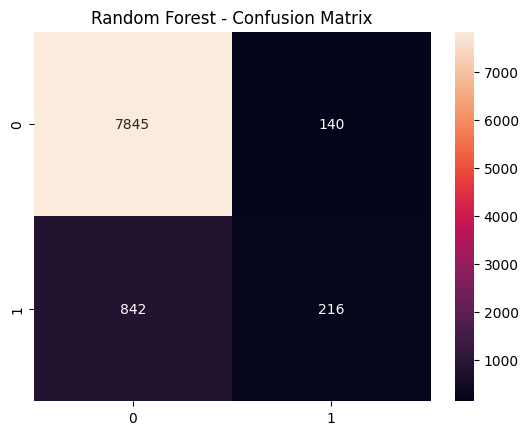

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_y_pred_test), annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()


## NN using tensorflow 

In [196]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, classification_report

# # Build Neural Network Model
# nn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# # Compile Model
# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the Model
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# # Predictions
# nn_test_preds = (nn_model.predict(X_test) > 0.5).astype("int32")

# nn_ten =accuracy_score(y_test, nn_test_preds)

# # Evaluation
# print("Neural Network - Testing Accuracy:", nn_ten)
# print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))


In [197]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, classification_report

# # Build Neural Network Model
# nn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],), name="Input_Layer"),
#     Dense(64, activation='relu', name="Hidden_Layer1"),
#     Dense(32, activation='relu', name="Hidden_Layer2"),
#     Dense(1, activation='sigmoid', name="Output_Layer")  # Binary classification
# ])

# # Compile Model
# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the Model
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# history = nn_model.fit(
#     X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1
# )

# # Evaluate on Test Set
# nn_test_preds = (nn_model.predict(X_test) > 0.5).astype("int32")
# test_accuracy = accuracy_score(y_test, nn_test_preds)
# print("Testing Accuracy:", test_accuracy)
# print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))


## NN using pytorch

In [198]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from torch.utils.data import DataLoader, TensorDataset


# # Convert DataFrames to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# # Create DataLoader for batching
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
#         self.relu = nn.ReLU()                         # Activation function
#         self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Define model parameters
# input_size = X_train.shape[1]  # Number of features
# hidden_size = 64               # Number of neurons in the hidden layer
# output_size = len(y_train.unique())  # Number of output classes (binary: 2)

# # Initialize the model
# model = NeuralNet(input_size, hidden_size, output_size)

# criterion = nn.CrossEntropyLoss()  # Loss function for classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# # Training the model
# epochs = 20
# model.train()

# for epoch in range(epochs):
#     epoch_loss = 0
#     for X_batch, y_batch in train_loader:
#         # Forward pass
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#     print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

# # Evaluation
# model.eval()
# y_pred = []
# y_true = []

# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_pred.extend(predicted.numpy())
#         y_true.extend(y_batch.numpy())

# # Metrics
# print("Accuracy:", accuracy_score(y_true, y_pred))
# print("Classification Report:")
# print(classification_report(y_true, y_pred))

# # Confusion Matrix
# sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()



In [199]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from torch.utils.data import DataLoader, TensorDataset

# # Ensure reproducibility
# torch.manual_seed(42)

# # Convert preprocessed DataFrames to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# # Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
# X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# # Create DataLoader for batching
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # Neural Network Model
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
#         self.relu = nn.ReLU()                         # Activation function
#         self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Define model parameters
# input_size = X_train.shape[1]  # Number of features
# hidden_size = 64               # Number of neurons in the hidden layer
# output_size = len(y_train.unique())  # Number of output classes

# # Initialize the model
# model = NeuralNet(input_size, hidden_size, output_size).to(device)
# criterion = nn.CrossEntropyLoss()  # Loss function for classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# # Training the model
# epochs = 20
# losses = []

# for epoch in range(epochs):
#     model.train()
#     epoch_loss = 0
#     correct = 0
#     total = 0
#     for X_batch, y_batch in train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         # Forward pass
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         correct += (predicted == y_batch).sum().item()
#         total += y_batch.size(0)

#     epoch_accuracy = correct / total
#     losses.append(epoch_loss / len(train_loader))
#     print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.4f}")

# # Plot training loss
# plt.plot(range(1, epochs + 1), losses, marker='o')
# plt.title("Training Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.grid()
# plt.show()

# # Evaluation
# model.eval()
# y_pred = []
# y_true = []

# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_pred.extend(predicted.cpu().numpy())
#         y_true.extend(y_batch.cpu().numpy())

# # Metrics
# print("Accuracy:", accuracy_score(y_true, y_pred))
# print("Classification Report:")
# print(classification_report(y_true, y_pred))

# # Confusion Matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

# # # Save the model
# # torch.save(model.state_dict(), 'neural_net_model.pth')
# # print("Model saved as 'neural_net_model.pth'")


# Evaluation

In [200]:
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming you already have these variables
# # rf_y_pred_test: Predicted labels from Random Forest
# # nn_y_pred_test_pytorch: Predicted labels from PyTorch Neural Network (y_pred)
# # nn_y_pred_test_tensorflow: Predicted labels from TensorFlow Neural Network (nn_test_preds)
# # y_test: True labels (ground truth)

# # Calculate accuracies using the predicted labels
# rf_accuracy = accuracy_score(y_test, rf_y_pred_test)  # Random Forest Accuracy
# nn_accuracy = accuracy_score(y_test, y_pred)  # Neural Network Accuracy (PyTorch)
# nn_ten_accuracy = accuracy_score(y_test, nn_test_preds)  # Neural Network Accuracy (TensorFlow)

# # Printing the accuracies
# print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
# print(f"Neural Network Accuracy (PyTorch): {nn_accuracy:.4f}")
# print(f"Neural Network Accuracy (TensorFlow): {nn_ten_accuracy:.4f}")


In [201]:
# # Compare Accuracies
# rf_accuracy = accuracy_score(y_test, rf_y_pred_test)  # Corrected variable
# nn_accuracy = accuracy_score(y_true, y_pred)

# print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
# print(f"Neural Network Accuracy Pytorch: {nn_accuracy:.4f}")
# print(f"Neural Network Accuracy tensorflow: {nn_ten:.4f}")

# if nn_accuracy > rf_accuracy:
#     print("Neural Network performs better.")
# elif rf_accuracy > nn_accuracy:
#     print("Random Forest performs better.")
# else:
#     print("Both models perform equally well.")


In [202]:
# import matplotlib.pyplot as plt

# # List of model names and their corresponding accuracies
# model_names = ['Random Forest', 'Neural Network (PyTorch)', 'Neural Network (TensorFlow)']
# accuracies = [rf_accuracy, nn_accuracy, nn_ten_accuracy]

# # Create the bar chart
# plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])

# # Set the y-axis limit to range from 0 to 1 (accuracy is between 0 and 1)
# plt.ylim(0, 1)

# # Add labels and title
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')

# # Display the bar chart
# plt.show()


In [203]:
# # Bar Chart for Accuracy Comparison
# model_names = ['Random Forest', 'Neural Network']
# accuracies = [rf_accuracy, nn_accuracy]

# plt.bar(model_names, accuracies, color=['blue', 'orange'])
# plt.ylim(0, 1)
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')
# plt.show()


# Tunning

#### RF tunning

In [204]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# # Initialize model
# rf = RandomForestClassifier(random_state=42)

# # Grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


In [205]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     # 'bootstrap': [True, False]
# }

# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters and cross-validated accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# # Use the best model to predict on the test set
# best_rf_model = grid_search.best_estimator_
# rf_y_pred_test = best_rf_model.predict(X_test)

# rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test)

# # Evaluate on the test set
# print("Random Forest - Test Accuracy after Tuning:", rf_accuracy_tuned)
# print("Random Forest - Classification Report after Tuning:")
# print(classification_report(y_test, rf_y_pred_test))


In [206]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     # 'bootstrap': [True, False]
# }

# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters and cross-validated accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# # Use the best model to predict on the test set
# best_rf_model = grid_search.best_estimator_
# rf_y_pred_test = best_rf_model.predict(X_test)

# rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test)

# # Evaluate on the test set
# print("Random Forest - Test Accuracy after Tuning:", rf_accuracy_tuned)
# print("Random Forest - Classification Report after Tuning:")
# print(classification_report(y_test, rf_y_pred_test))


In [207]:
# # Calculate training accuracy
# rf_y_pred_train = best_rf_model.predict(X_train)

# # Evaluate on the training set
# rf_accuracy_train = accuracy_score(y_train, rf_y_pred_train)

# print("Random Forest - Training Accuracy after Tuning:", rf_accuracy_train)


#### tenorflow

In [208]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, classification_report
# import keras_tuner as kt  # Import Keras Tuner

# # Define the model builder function for hyperparameter tuning
# def build_model(hp):
#     model = Sequential()
#     # Input Layer
#     model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32), 
#                     activation='relu', input_shape=(X_train.shape[1],), name="Input_Layer"))
#     # Hidden Layers
#     for i in range(hp.Int('num_hidden_layers', 1, 3)):  # 1 to 3 hidden layers
#         model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=16), 
#                         activation='relu', name=f"Hidden_Layer{i+1}"))
#     # Output Layer
#     model.add(Dense(1, activation='sigmoid', name="Output_Layer"))

#     # Compile the model
#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )
#     return model

# # Initialize the tuner
# tuner = kt.RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=10,  # Number of hyperparameter combinations to try
#     executions_per_trial=2,  # Number of models to train for each trial
#     directory='hyper_tuning',
#     project_name='nn_tuning'
# )

# # Early stopping to prevent overfitting
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# # Perform the search
# tuner.search(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The optimal number of units in the input layer is {best_hps.get('units_input')}.
# The optimal number of hidden layers is {best_hps.get('num_hidden_layers')}.
# The optimal learning rate is {best_hps.get('learning_rate')}.
# """)

# # Train the best model
# best_model = tuner.hypermodel.build(best_hps)
# history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# # Evaluate the tuned model on the test set
# nn_test_preds = (best_model.predict(X_test) > 0.5).astype("int32")
# nn_tenorflow_test_accuracy = accuracy_score(y_test, nn_test_preds)
# print("Testing Accuracy after Tuning:", nn_tenorflow_test_accuracy)
# print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))




#### NN tunnung 

In [209]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score
# from torch.utils.data import DataLoader, TensorDataset

# # Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Define the Neural Network
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Function to train the model
# def train_model(model, train_loader, criterion, optimizer, device, epochs=20):
#     model.train()
#     for epoch in range(epochs):
#         epoch_loss = 0
#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             optimizer.zero_grad()
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()
#         print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# # Function to evaluate the model
# def evaluate_model(model, test_loader, device):
#     model.eval()
#     y_pred, y_true = [], []
#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
#             y_true.extend(y_batch.cpu().numpy())
#     return accuracy_score(y_true, y_pred)

# # Hyperparameter search
# hidden_sizes = [32, 64, 128]
# learning_rates = [0.001, 0.01, 0.1]
# batch_sizes = [16, 32, 64]

# best_accuracy = 0
# best_hyperparameters = {}

# for hidden_size in hidden_sizes:
#     for lr in learning_rates:
#         for batch_size in batch_sizes:
#             # Prepare data loaders
#             train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
#                                            torch.tensor(y_train.values, dtype=torch.long))
#             test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
#                                           torch.tensor(y_test.values, dtype=torch.long))
#             train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#             test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#             # Initialize model, loss, and optimizer
#             model = NeuralNet(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2).to(device)
#             criterion = nn.CrossEntropyLoss()
#             optimizer = optim.Adam(model.parameters(), lr=lr)

#             # Train and evaluate
#             train_model(model, train_loader, criterion, optimizer, device, epochs=20)
#             accuracy = evaluate_model(model, test_loader, device)

#             # Save best hyperparameters
#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_hyperparameters = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}

#             print(f"Hidden Size: {hidden_size}, LR: {lr}, Batch Size: {batch_size}, Accuracy: {accuracy:.4f}")

# # Output the best hyperparameters
# print(f"Best Hyperparameters: {best_hyperparameters}")
# print(f"Best Accuracy: {best_accuracy:.4f}")


# evaluation

In [210]:
# from sklearn.metrics import accuracy_score, classification_report

# # After tuning, you already have the best_rf_model (tuned Random Forest model)

# # Predict the outcomes on the test set
# rf_y_pred_test_tuned = best_rf_model.predict(X_test)

# # Calculate accuracy after tuning for the Random Forest model
# rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test_tuned)


# ### delete above

# # Print the accuracy after tuning
# print(f"Random Forest Accuracy (Tuned): {rf_accuracy_tuned:.4f}")

# # Optionally, print the classification report for further evaluation
# print("\nRandom Forest Classification Report (Tuned):")
# print(classification_report(y_test, rf_y_pred_test_tuned))


In [211]:
# # Output the best hyperparameters
# print(f"Best Hyperparameters: {best_hyperparameters}")
# print(f"Best Accuracy: {best_accuracy:.4f}")



In [212]:

# # Print the accuracy after tuning
# print(f"TensorFlow Neural Network Accuracy (Tuned): {nn_tenorflow_test_accuracy:.4f}")

# # Optionally, print the classification report for further evaluation
# print("\nTensorFlow Neural Network Classification Report (Tuned):")
# print(classification_report(y_test, nn_test_preds))


In [213]:
# import matplotlib.pyplot as plt

# # List of model names and their corresponding accuracies
# model_names = ['Random Forest', 'Neural Network (PyTorch)', 'Neural Network (TensorFlow)']
# accuracies = [rf_accuracy_tuned, best_accuracy, nn_tenorflow_test_accuracy]

# # Create the bar chart
# plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])

# # Set the y-axis limit to range from 0 to 1 (accuracy is between 0 and 1)
# plt.ylim(0, 1)

# # Add labels and title
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')

# # Display the bar chart
# plt.show()

# saving the model

In [214]:
# import joblib

# # Save the best Random Forest model
# joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
# print("Random Forest model saved successfully!")


In [215]:
# # Save the entire model
# torch.save(model, 'best_tuned_model_PY.pth')
# print("Tuned model saved successfully!")

In [216]:
# # Save the tuned model
# best_model.save("best_tuned_mode_Ten.h5")
# print("Tuned model saved as 'best_tuned_model.h5'")